# Proyect to evaluate buy or sell bitcoin

## Libraries

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

## Loading Data from source

In [2]:
#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

In [3]:
data = yf.download(tickers='BTC-USD',period = '60d', interval = '5m')

[*********************100%***********************]  1 of 1 completed


In [4]:
#data = yf.download(tickers='BTC-USD',period = '720d', interval = '1h')

In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-09 00:00:00+00:00,41734.726562,41734.726562,41651.171875,41651.171875,41651.171875,0
2022-01-09 00:05:00+00:00,41645.000000,41645.000000,41572.351562,41572.351562,41572.351562,0
2022-01-09 00:10:00+00:00,41540.074219,41554.332031,41507.339844,41554.332031,41554.332031,43618304
2022-01-09 00:15:00+00:00,41545.511719,41618.441406,41545.511719,41600.527344,41600.527344,63961088
2022-01-09 00:20:00+00:00,41589.808594,41610.636719,41563.726562,41568.746094,41568.746094,0
...,...,...,...,...,...,...
2022-03-09 23:40:00+00:00,42054.628906,42054.628906,41980.894531,41991.832031,41991.832031,61483008
2022-03-09 23:45:00+00:00,41999.402344,42024.023438,41999.402344,42001.617188,42001.617188,18233344
2022-03-09 23:50:00+00:00,42000.750000,42000.750000,41977.273438,41977.273438,41977.273438,0


## Exploratory Data Analysis

In [6]:
# shape
data.shape

(17269, 6)

In [7]:
# peek at data
set_option('display.width', 100)
data.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-03-09 23:40:00+00:00,42054.628906,42054.628906,41980.894531,41991.832031,41991.832031,61483008
2022-03-09 23:45:00+00:00,41999.402344,42024.023438,41999.402344,42001.617188,42001.617188,18233344
2022-03-09 23:50:00+00:00,42000.750000,42000.750000,41977.273438,41977.273438,41977.273438,0
2022-03-09 23:55:00+00:00,41972.203125,41972.203125,41972.203125,41972.203125,41972.203125,0
2022-03-09 23:56:00+00:00,41977.382812,41977.382812,41977.382812,41977.382812,41977.382812,0


In [8]:
# describe data
set_option('precision', 3)
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,17269.000,17269.000,17269.000,17269.000,17269.000,1.727e+04
mean,40352.390,40372.615,40332.190,40352.369,40352.369,5.741e+07
std,2712.273,2710.030,2714.493,2712.298,2712.298,1.779e+09
min,33197.680,33233.336,33184.059,33227.504,33227.504,0.000e+00
25%,38126.844,38146.727,38104.391,38122.426,38122.426,0.000e+00
50%,40760.555,40775.559,40741.277,40759.953,40759.953,3.725e+06
75%,42700.203,42717.828,42685.680,42700.676,42700.676,3.844e+07
max,45626.637,45661.172,45542.531,45661.172,45661.172,2.315e+11


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

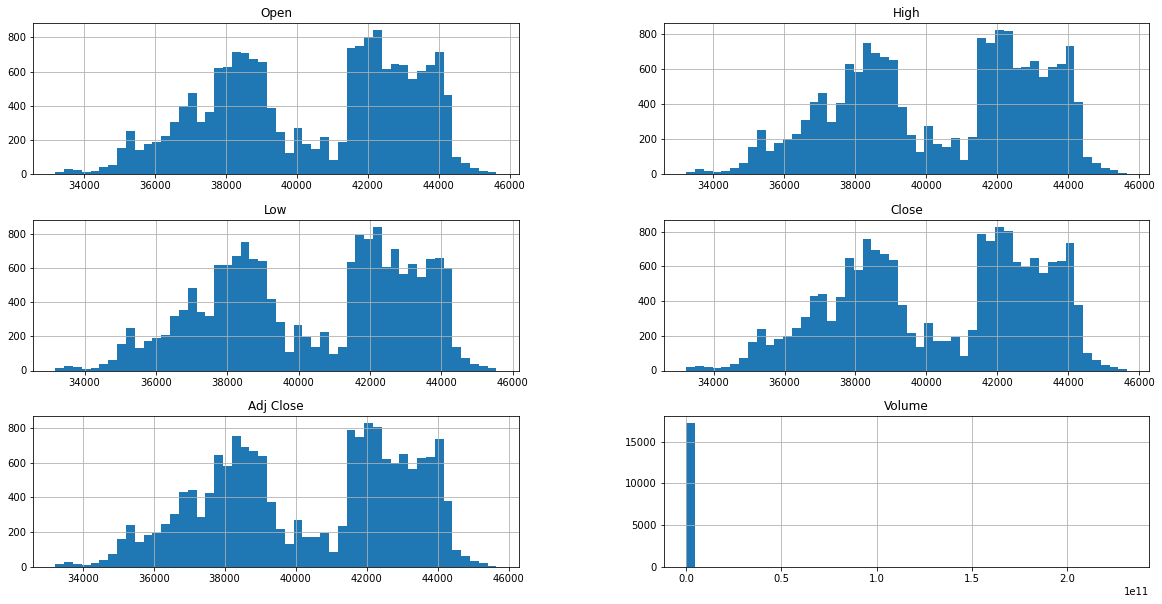

In [9]:
data.hist(bins=50,figsize=(20,10))

# Data Preparation

## Data Cleaning

In [10]:
#Checking for any null values and removing the null values'''
print('Null Values =',data.isnull().values.any())

Null Values = False


In [11]:
data[data.columns.values] = data[data.columns.values].ffill()

In [12]:
dataset=data.reset_index(drop=True)

In [13]:
dataset

,Open,High,Low,Close,Adj Close,Volume
0,41734.727,41734.727,41651.172,41651.172,41651.172,0
1,41645.000,41645.000,41572.352,41572.352,41572.352,0
2,41540.074,41554.332,41507.340,41554.332,41554.332,43618304
3,41545.512,41618.441,41545.512,41600.527,41600.527,63961088
4,41589.809,41610.637,41563.727,41568.746,41568.746,0
...,...,...,...,...,...,...
17264,42054.629,42054.629,41980.895,41991.832,41991.832,61483008
17265,41999.402,42024.023,41999.402,42001.617,42001.617,18233344
17266,42000.750,42000.750,41977.273,41977.273,41977.273,0
17267,41972.203,41972.203,41972.203,41972.203,41972.203,0


### Preparing the data for classification

In [14]:
# Initialize the `signals` DataFrame with the `signal` column
#datas['PriceMove'] = 0.0

# Create short simple moving average over the short window
dataset['short_mavg'] = dataset['Close'].rolling(window=10, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
dataset['long_mavg'] = dataset['Close'].rolling(window=60, min_periods=1, center=False).mean()

# Create signals or target
dataset['signal'] = np.where(dataset['short_mavg'] > dataset['long_mavg'], 1.0, 0.0)

In [15]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,short_mavg,long_mavg,signal
17264,42054.629,42054.629,41980.895,41991.832,41991.832,61483008,41954.693,41957.611,0.0
17265,41999.402,42024.023,41999.402,42001.617,42001.617,18233344,41964.064,41958.373,1.0
17266,42000.750,42000.750,41977.273,41977.273,41977.273,0,41974.228,41958.320,1.0
17267,41972.203,41972.203,41972.203,41972.203,41972.203,0,41979.932,41957.489,1.0
17268,41977.383,41977.383,41977.383,41977.383,41977.383,0,41982.594,41957.239,1.0


We begin by the constructing a dataset that contains the predictors which will be used to make the predictions, and the output variable.

The current Data of the bicoin consists of date, open, high, low, close and Volume. Using this data we calculate the following technical indicators:

Moving Average : A moving average provides an indication of the trend of the price movement by cut down the amount of "noise" on a price chart.
Stochastic Oscillator %K and %D : A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. %K and %D are slow and fast indicators.
Relative Strength Index(RSI) :It is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.
Rate Of Change(ROC): It is a momentum oscillator, which measures the percentage change between the current price and the n period past price.
Momentum (MOM) : It is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing.

In [16]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA
dataset['EMA10'] = EMA(dataset, 10)
dataset['EMA30'] = EMA(dataset, 30)
dataset['EMA200'] = EMA(dataset, 200)
dataset.head()

#calculation of rate of change
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC
dataset['ROC10'] = ROC(dataset['Close'], 10)
dataset['ROC30'] = ROC(dataset['Close'], 30)

#Calculation of price momentum
def MOM(df, n):   
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))   
    return MOM
dataset['MOM10'] = MOM(dataset['Close'], 10)
dataset['MOM30'] = MOM(dataset['Close'], 30)

#calculation of relative strength index
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = u.ewm(com=period-1, adjust=False).mean() / \
    d.ewm(com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)
dataset['RSI10'] = RSI(dataset['Close'], 10)
dataset['RSI30'] = RSI(dataset['Close'], 30)
dataset['RSI200'] = RSI(dataset['Close'], 200)

#calculation of stochastic osillator.

def STOK(close, low, high, n): 
    STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
    return STOK

def STOD(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
    STOD = STOK.rolling(3).mean()
    return STOD

dataset['%K10'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%D10'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%K30'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%D30'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%K200'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 200)
dataset['%D200'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 200)

In [17]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
dataset['MA21'] = MA(dataset, 10)
dataset['MA63'] = MA(dataset, 30)
dataset['MA252'] = MA(dataset, 200)
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,short_mavg,long_mavg,signal,EMA10,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
17264,42054.629,42054.629,41980.895,41991.832,41991.832,61483008,41954.693,41957.611,0.0,41969.928,...,55.371,63.729,86.452,77.633,90.436,48.074,51.923,41954.693,41906.391,42041.781
17265,41999.402,42024.023,41999.402,42001.617,42001.617,18233344,41964.064,41958.373,1.0,41975.690,...,55.419,68.801,76.053,80.761,85.162,48.789,50.682,41964.064,41914.318,42043.857
17266,42000.750,42000.750,41977.273,41977.273,41977.273,0,41974.228,41958.320,1.0,41975.978,...,55.270,56.182,62.904,72.979,77.124,46.102,47.655,41974.228,41921.848,42045.785
17267,41972.203,41972.203,41972.203,41972.203,41972.203,0,41979.932,41957.489,1.0,41975.292,...,55.239,38.010,54.331,71.359,75.033,43.585,46.159,41979.932,41928.390,42047.723
17268,41977.383,41977.383,41977.383,41977.383,41977.383,0,41982.594,41957.239,1.0,41975.672,...,55.265,41.594,45.262,73.014,72.451,43.290,44.326,41982.594,41935.433,42049.578


In [18]:
#excluding columns that are not needed for our prediction.

dataset=dataset.drop(['High','Low','Open'], axis=1)

In [19]:
dataset = dataset.dropna(axis=0)

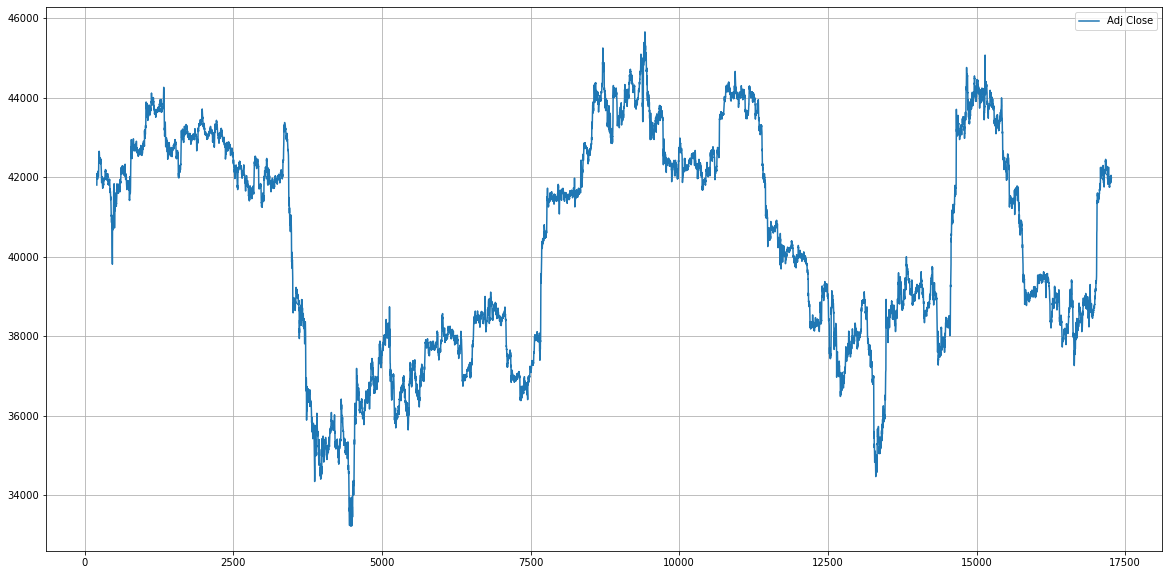

In [20]:
dataset[['Adj Close']].plot(grid=True,figsize=(20,10))
plt.show()

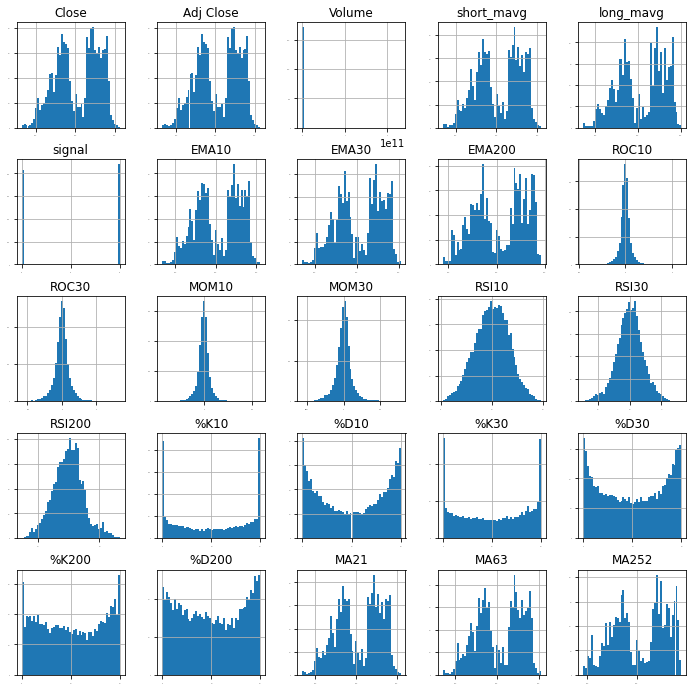

In [21]:
# histograms
dataset.hist(bins=50,sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

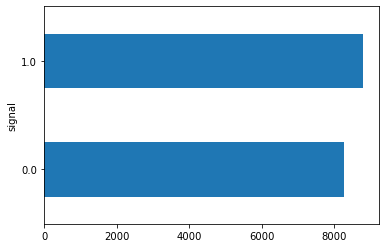

In [22]:
fig = plt.figure()
plot = dataset.groupby(['signal']).size().plot(kind='barh')
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

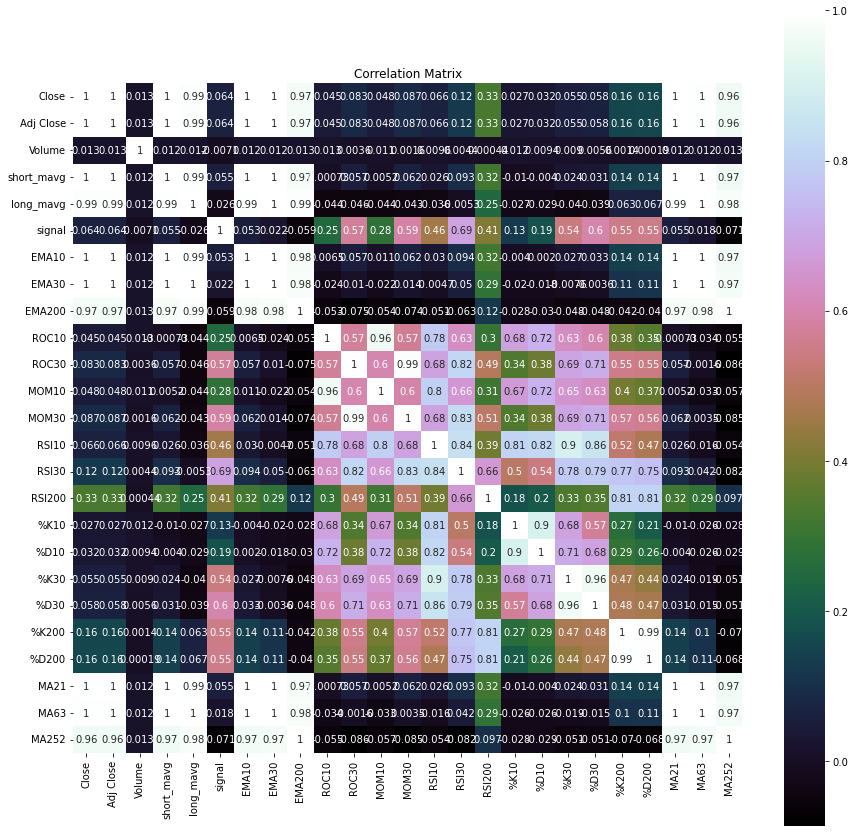

In [23]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

## 5. Evaluate Algorithms and Models

### Train Test Split

In [24]:
print(dataset["signal"].count())

div = round(dataset["signal"].count()*.2,0)

print(int(div))

#dataset.iloc[:dataset["signal"].count() - int(div)]
#dataset.iloc[-int(div):]

train_dataset = dataset.iloc[:dataset["signal"].count() - int(div)]
test_dataset= dataset.iloc[-int(div):]

Y_train= train_dataset["signal"]
X_train = train_dataset.loc[:, dataset.columns != 'signal']

Y_validation= test_dataset["signal"]
X_validation = test_dataset.loc[:, dataset.columns != 'signal']

17068
3414


### Test option evaluation metrics

In [25]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'
#scoring = 'precision'
#scoring = 'recall'
#scoring ='neg_log_loss'
#scoring = 'roc_auc'
#scoring = 'F1'

### Compare Models and Algorithms

#### Models

In [26]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Neural Network
models.append(('NN', MLPClassifier()))
#Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

#### K-folds cross validation

In [27]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.526582 (0.040106)
LDA: 0.911674 (0.020583)
KNN: 0.605091 (0.026291)
CART: 0.874616 (0.015342)
NB: 0.505500 (0.069618)
NN: 0.534289 (0.073497)
AB: 0.909476 (0.019981)
GBM: 0.914677 (0.018609)
RF: 0.900834 (0.021621)


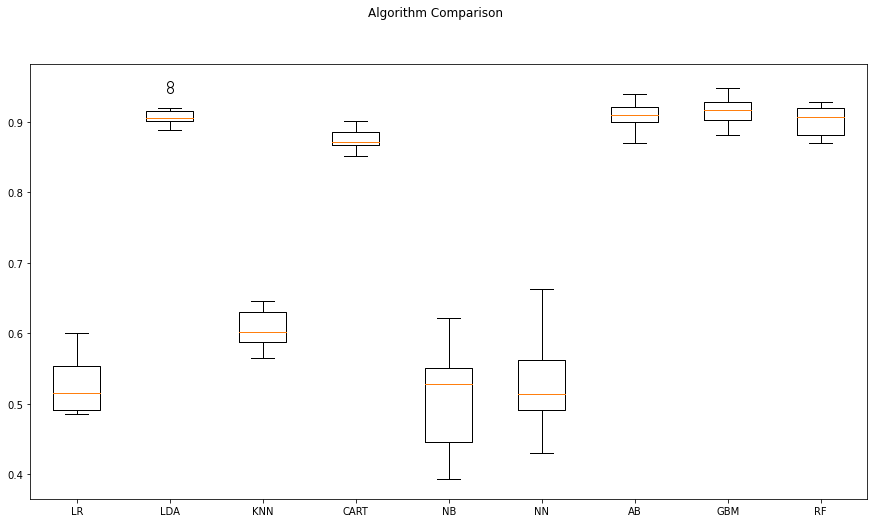

In [28]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

## Model Tuning and Grid Search

Random forest is selected for the grid search as it is one of the best models out of all.

In [29]:
# Grid Search: Random Forest Classifier
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables    
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
    
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80]
max_depth= [5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier(n_jobs=-1)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.899661 using {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}
#6 0.881277 (0.028076) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#7 0.879813 (0.024348) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#2 0.896073 (0.021696) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#3 0.895853 (0.022103) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#8 0.876151 (0.029087) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#5 0.882229 (0.025888) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#4 0.895047 (0.021363) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#1 0.899661 (0.022601) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


## Finalise the Model

In [30]:
# prepare model
model = RandomForestClassifier(criterion='gini', n_estimators=80,max_depth=10,n_jobs=-1) # rbf is default kernel
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=80, n_jobs=-1)

In [31]:
# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8989455184534271
[[1464  146]
 [ 199 1605]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      1610
         1.0       0.92      0.89      0.90      1804

    accuracy                           0.90      3414
   macro avg       0.90      0.90      0.90      3414
weighted avg       0.90      0.90      0.90      3414



In [32]:
from sklearn.metrics import precision_score, recall_score

print('precision: ' + str(precision_score(Y_validation, predictions)))
print('recall : ' + str(recall_score(Y_validation, predictions)))

precision: 0.9166190748143918
recall : 0.8896895787139689


In [33]:
from sklearn.metrics import f1_score

f1_score(Y_validation, predictions)

0.9029535864978901

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

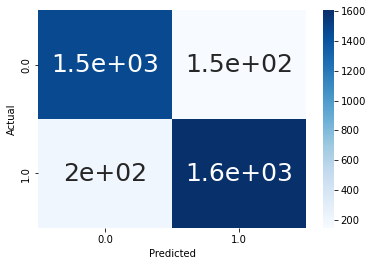

In [42]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 25})# font sizes

In [35]:
from sklearn.metrics import precision_recall_curve
y_scores_forest = model.predict_proba(X_validation)
y_scores_forest = y_scores_forest[:,1]
print(y_scores_forest)
precisions, recalls, thresholds = precision_recall_curve(Y_validation, y_scores_forest)

[0.32198077 0.44191296 0.36261864 ... 0.62013111 0.76561064 0.7128039 ]


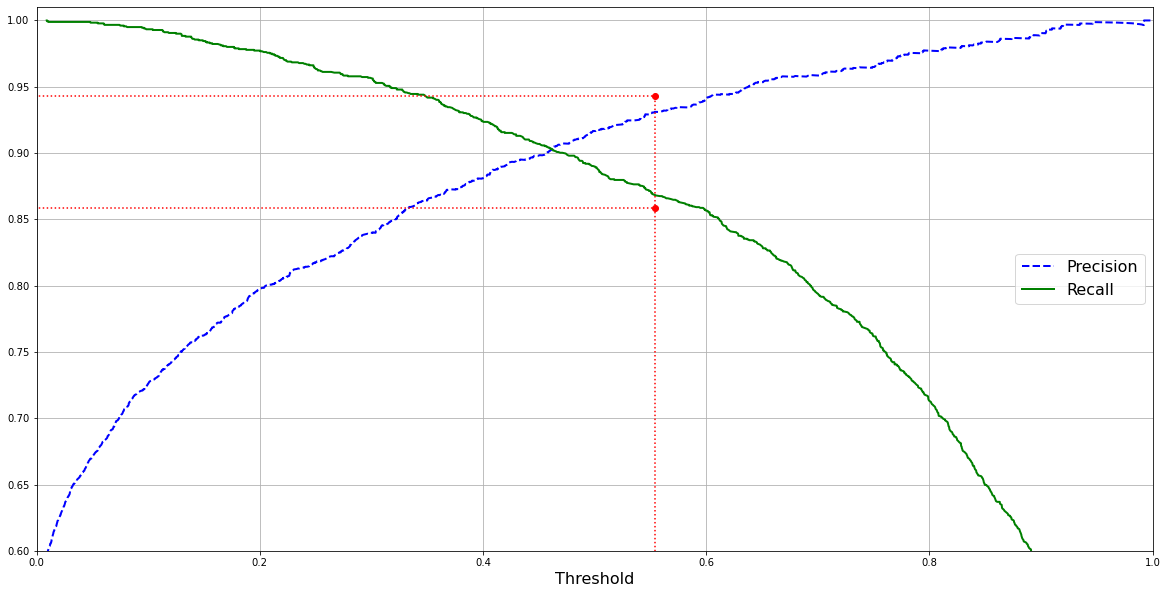

In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-0, 1, .6, 1.01])             

recall_90_precision = recalls[np.argmax(precisions >= 0.939)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.931)]


plt.figure(figsize=(20, 10))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.943], "r:")                
plt.plot([-10, threshold_90_precision], [0.943, 0.943], "r:")                               
plt.plot([-10, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.943], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                             
plt.show()

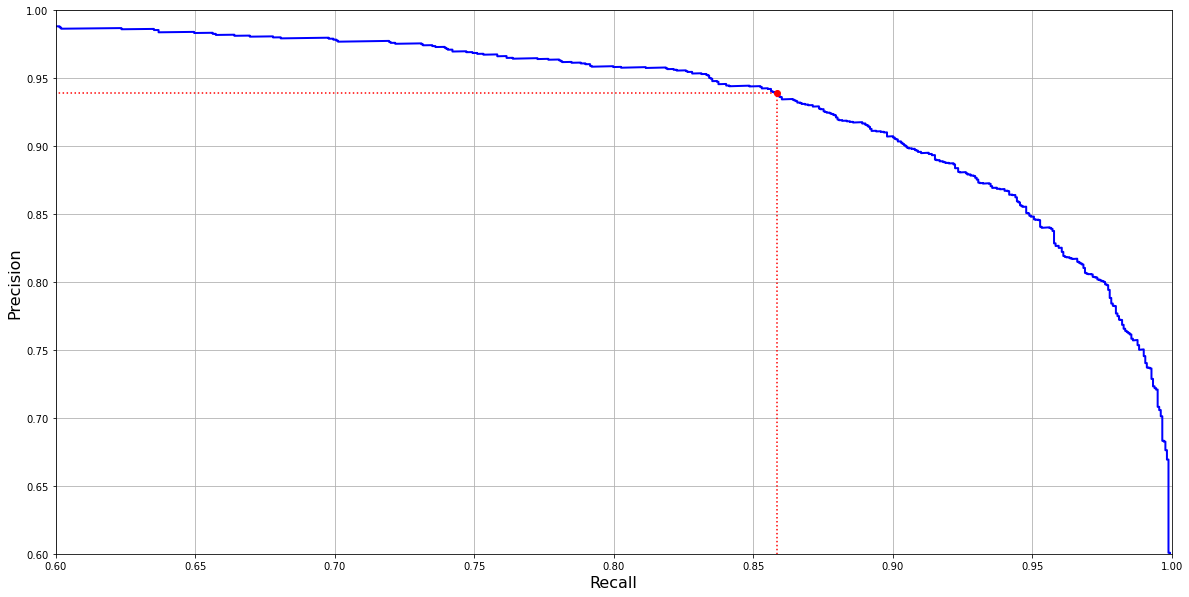

In [37]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0.6, 1, 0.6, 1])
    plt.grid(True)

plt.figure(figsize=(20, 10))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.939], "r:")
plt.plot([0.0, recall_90_precision], [0.939, 0.939], "r:")
plt.plot([recall_90_precision], [0.939], "ro")
plt.show()

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_validation, y_scores_forest)

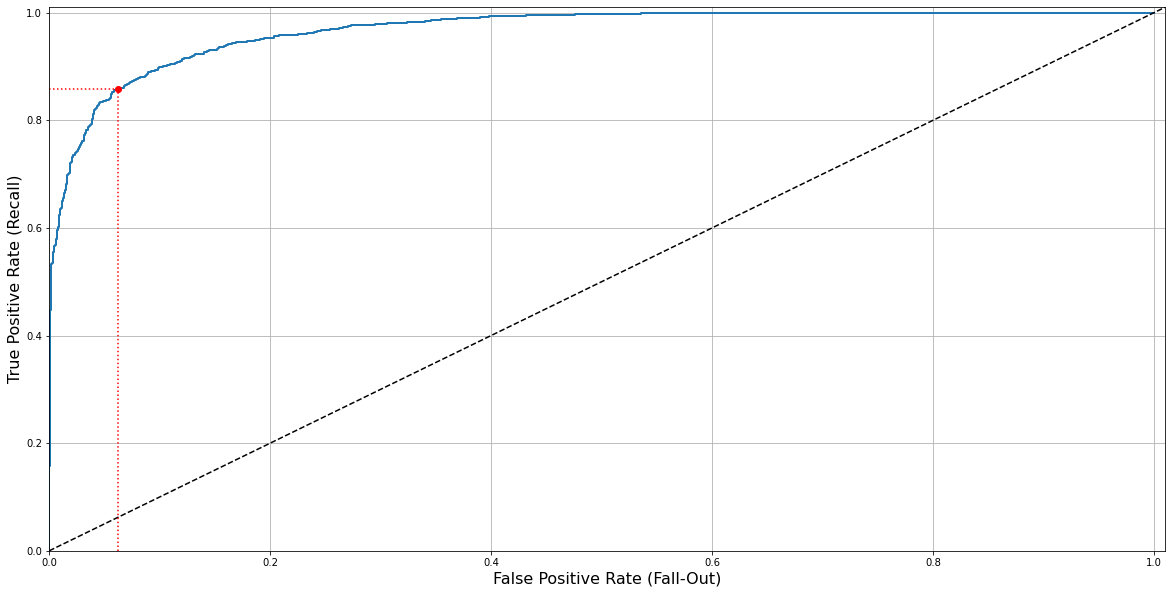

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1.01], [0, 1.01], 'k--') # dashed diagonal
    plt.axis([0, 1.01, 0, 1.01])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                           

plt.figure(figsize=(20, 10))                                   
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")              
plt.show()

### Variable Intuition/Feature Importance

Text(0.5, 0, 'Variable Importance')

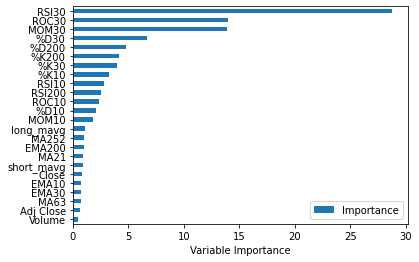

In [40]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh')
plt.xlabel('Variable Importance')

## Backtesting Results

Strategy: 0.11
Actual: 0.08
48.69% plus on return


<AxesSubplot:>

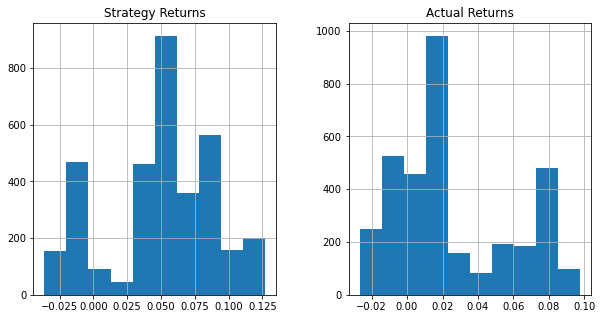

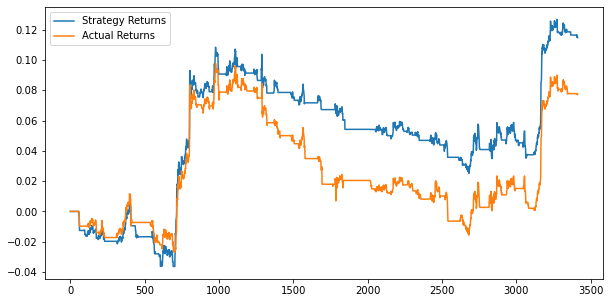

In [41]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtestdata = pd.DataFrame(index=X_validation.index)
#backtestdata = pd.DataFrame()
backtestdata['signal_pred'] = predictions
backtestdata['signal_actual'] = Y_validation
backtestdata['Market Returns'] = X_validation['Close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata=backtestdata.reset_index()
backtestdata.head()
print('Strategy: ' + str(round(backtestdata['Strategy Returns'].sum(),2)))
print('Actual: ' + str(round(backtestdata['Actual Returns'].sum(),2)))
print(
    str(abs(round(((backtestdata['Strategy Returns'].sum()/backtestdata['Actual Returns'].sum()) - 1)*100,2))) 
    + '% plus on return')

backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist(figsize=(10,5))
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot(figsize=(10,5))

In [43]:
''' Guardar Modelo'''
import pickle

pkl_filname = 'bitcoin_rf_model.pkl'

with open(pkl_filname,'wb') as file:
    pickle.dump(model,file)